In [1]:
import numpy as np
import tensorflow
import keras

import matplotlib
import pylab as plt

from keras.layers import Dense
from keras.models import Sequential

Using TensorFlow backend.


In [2]:
def xor(x1, x2):
    if 1/(x1*x1) + 1/(x2*x2) > 4:
        return 1
    return 0

In [3]:
np.random.seed(420)

In [4]:
vxor = np.vectorize(xor)

In [5]:
X = np.random.randn(10000, 2,)
y = vxor(X[:,0], X[:,1])

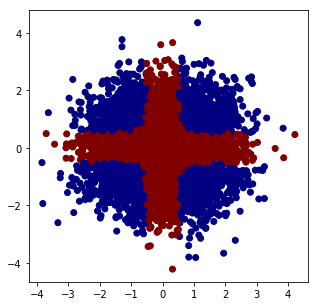

In [6]:
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, cmap=matplotlib.cm.jet)
plt.show()

In [7]:
model = Sequential()
model.add(Dense(8, use_bias=True, activation='sigmoid', input_shape=(2,)))
model.add(Dense(1, use_bias=True, activation='sigmoid'))
model.compile(optimizer = keras.optimizers.SGD(lr=1e-1), loss='mean_squared_error')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 24        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [8]:
X.shape, y.shape

((10000, 2), (10000,))

In [9]:
history = model.fit(X, y[:,np.newaxis], batch_size=1, epochs=4, verbose=1, shuffle=False)

Epoch 1/4
10000/10000 [==============================] - 7s 693us/step - loss: 0.1992
Epoch 2/4
10000/10000 [==============================] - 7s 685us/step - loss: 0.0639
Epoch 3/4
10000/10000 [==============================] - 7s 668us/step - loss: 0.0322
Epoch 4/4
10000/10000 [==============================] - 7s 669us/step - loss: 0.0251


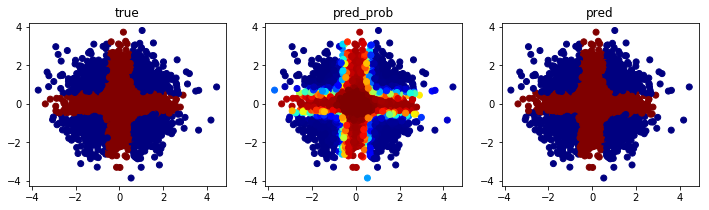

In [10]:
Xt = np.random.randn(5000, 2)
yt = vxor(Xt[:,0], Xt[:,1])
ypp = model.predict(Xt)[:,0]
yp = model.predict_classes(Xt)[:,0]

fig, ax = plt.subplots(ncols=3, figsize=(12,3))
ax[0].scatter(Xt[:,0], Xt[:,1], c=yt, cmap=matplotlib.cm.jet)
ax[1].scatter(Xt[:,0], Xt[:,1], c=ypp, cmap=matplotlib.cm.jet)
ax[2].scatter(Xt[:,0], Xt[:,1], c=yp, cmap=matplotlib.cm.jet)
ax[0].set_title('true')
ax[1].set_title('pred_prob')
ax[2].set_title('pred')
plt.show()

In [11]:
np.max(ypp)

0.9999863

In [16]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_der(sx):
    return sx * (1 - sx)


class MLP:

    def __init__(self, lr):
        self.lr = lr
        self.layers = list()

    def add(self, inshape, outshape):
        self.layers.append(LayerMLP(inshape, outshape))
    
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def backprop(self, y):
        err = 2 * (y - self.layers[-1].y)
        for layer in reversed(self.layers):
            err = layer.backprop(err, self.lr)
        return True
            


class LayerMLP:

    def __init__(self, inshape, outshape):
        self.weight = np.random.randn(outshape, inshape)
        self.bias = np.zeros((outshape, 1))
        self.y = None
        self.x = None

    def __call__(self, x):
        y = np.matmul(self.weight, x) + self.bias
        self.y = sigmoid(y)
        self.x = x
        return self.y

    def backprop(self, err, lr):
        err = err * sigmoid_der(self.y)
        self.bias += err * lr
        self.weight += np.matmul(err, self.x.T) * lr
        error = np.matmul(self.weight.T, err)
        return error

In [17]:
import random
from tqdm import tqdm

mlp = MLP(lr=0.1)
mlp.add(2,4)
mlp.add(4,1)

r = list(zip(X, y))
for i in tqdm(range(4)):
#     random.shuffle(r)
    for x, zt in r:
        _ = mlp(np.array([[x[0]], [x[1]]]))
        mlp.backprop(np.array([[zt]]))

100%|██████████| 4/4 [00:02<00:00,  1.83it/s]


In [18]:
ypp = np.zeros(X.shape[0])
yp = np.zeros(X.shape[0])
for i, x in enumerate(X):
    ypp[i] = mlp(np.array([[x[0]], [x[1]]]))
    yp[i] = 1 if ypp[i] >= 0.5 else 0

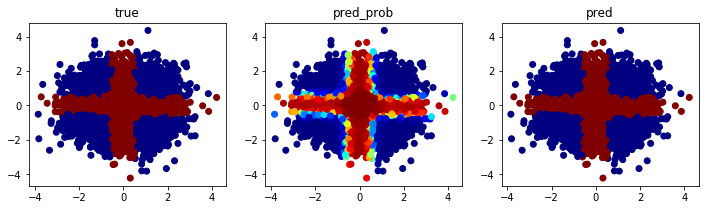

In [19]:
fig, ax = plt.subplots(ncols=3, figsize=(12,3))
ax[0].scatter(X[:,0], X[:,1], c=y, cmap=matplotlib.cm.jet)
ax[1].scatter(X[:,0], X[:,1], c=ypp, cmap=matplotlib.cm.jet)
ax[2].scatter(X[:,0], X[:,1], c=yp, cmap=matplotlib.cm.jet)
ax[0].set_title('true')
ax[1].set_title('pred_prob')
ax[2].set_title('pred')
plt.show()